In [1]:
'''
文件重命名建议
推荐命名：
utr_secondary_structure_comparison.py 或 rna_folding_analysis_195vs475.py
代码描述
项目概述
这是一个用于分析和比较UTR序列二级结构特征的生物信息学脚本。通过ViennaRNA包预测RNA二级结构，系统分析选中（195个）和未选中（280个）UTR之间的结构差异，揭示影响翻译效率的结构特征。
主要功能模块
1. 数据准备

加载475个初始UTR序列数据
根据是否被选入195个优质UTR进行分组
分离5'UTR和3'UTR进行独立分析

2. RNA二级结构预测与分析
核心算法：

使用ViennaRNA包计算最小自由能（MFE）和最优二级结构
解析点括号记法（dot-bracket notation）构建碱基配对映射
识别连续的茎区（stem）和环结构（loop）

提取的结构特征：

基本特征：序列长度、GC含量、MFE值
配对特征：配对碱基数、配对百分比
茎结构：茎的数量、位置、长度分布
环结构：环的数量、位置、大小分布

3. 批量处理功能
pythonbatch_analyze_rna_from_df()

支持DataFrame批量分析
自动跳过无效序列
进度条显示处理状态
结果保存为CSV格式

4. 综合可视化分析
12个分析维度（单个画布展示）：
基础特征比较（小提琴图）：

MFE分布
序列长度分布
GC含量分布
配对百分比分布
茎数量分布
环数量分布

结构元素分布（直方图）：
7. 茎长度分布（1-12bp）
8. 环大小分布（0-100nt）
相关性分析（散点图+回归线）：
9. 序列长度 vs 茎数量
10. 序列长度 vs 环数量
11. MFE vs 茎数量
12. MFE vs 环数量
5. 统计分析

计算每个特征的均值、中位数、标准差、最小值、最大值
Pearson和Spearman相关系数计算
线性回归分析（R²值）
生成汇总统计表

关键发现（根据代码注释）
5'UTR数据集特征：

UTR5_N195（未选中）：更长序列、更高GC含量、更稳定结构（更低MFE）
UTR5_N195显示强系统性关联：序列长度与结构元素数量高度相关
UTR5_195（选中）：相对较弱且不一致的相关性，结构组织相对松散

3'UTR数据集特征：

基本生化特征相似，主要差异在结构复杂性
UTR3_N195倾向形成更多短茎和小环结构
UTR3_195包含更多结构简单或线性程度更高的序列
两个3'UTR子集在长度-结构-稳定性关系上都表现出较强的系统性

输出文件
可视化图表：

PDF格式的12合1比较图
包含所有统计和相关性信息

数据文件：

各数据集的结构分析结果CSV
汇总统计表CSV

应用价值

筛选验证：验证UTR筛选的有效性
结构特征识别：发现影响翻译效率的关键结构特征
设计指导：为新UTR设计提供结构参数参考
机制理解：揭示UTR结构与功能的关系

技术特点

高效算法：优化的茎环识别算法
全面分析：12个维度的结构特征比较
统计严谨：多种相关性分析方法
可视化丰富：一图展示所有比较结果
'''

"\n文件重命名建议\n推荐命名：\nutr_secondary_structure_comparison.py 或 rna_folding_analysis_195vs475.py\n代码描述\n项目概述\n这是一个用于分析和比较UTR序列二级结构特征的生物信息学脚本。通过ViennaRNA包预测RNA二级结构，系统分析选中（195个）和未选中（280个）UTR之间的结构差异，揭示影响翻译效率的结构特征。\n主要功能模块\n1. 数据准备\n\n加载475个初始UTR序列数据\n根据是否被选入195个优质UTR进行分组\n分离5'UTR和3'UTR进行独立分析\n\n2. RNA二级结构预测与分析\n核心算法：\n\n使用ViennaRNA包计算最小自由能（MFE）和最优二级结构\n解析点括号记法（dot-bracket notation）构建碱基配对映射\n识别连续的茎区（stem）和环结构（loop）\n\n提取的结构特征：\n\n基本特征：序列长度、GC含量、MFE值\n配对特征：配对碱基数、配对百分比\n茎结构：茎的数量、位置、长度分布\n环结构：环的数量、位置、大小分布\n\n3. 批量处理功能\npythonbatch_analyze_rna_from_df()\n\n支持DataFrame批量分析\n自动跳过无效序列\n进度条显示处理状态\n结果保存为CSV格式\n\n4. 综合可视化分析\n12个分析维度（单个画布展示）：\n基础特征比较（小提琴图）：\n\nMFE分布\n序列长度分布\nGC含量分布\n配对百分比分布\n茎数量分布\n环数量分布\n\n结构元素分布（直方图）：\n7. 茎长度分布（1-12bp）\n8. 环大小分布（0-100nt）\n相关性分析（散点图+回归线）：\n9. 序列长度 vs 茎数量\n10. 序列长度 vs 环数量\n11. MFE vs 茎数量\n12. MFE vs 环数量\n5. 统计分析\n\n计算每个特征的均值、中位数、标准差、最小值、最大值\nPearson和Spearman相关系数计算\n线性回归分析（R²值）\n生成汇总统计表\n\n关键发现（根据代码注释）\n5'UTR数据集特征：\n\nUTR5_N195（未选中）：更长序列、更高GC含量、更稳定结构（更低MFE）\nUTR5_N195显示强系统

In [1]:
import RNA
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Data

In [2]:
utr_475 = pd.read_excel('./UTR_sequences/round_1_screening_475_UTR_sequences.xlsx', sheet_name='CDD Export 1')
utr_195 = pd.read_excel('./round_1_screening_luciferase_2_cell_lines/1078854 - Selection 195 UTRs for HepG2 screening/Attachments - 1078854 - Selection 195 UTRs for HepG2 scre/Selected 195 for HepG2 screening.xlsx', sheet_name = 'All 195')
utr_195 = pd.merge(utr_195, utr_475, left_on = 'rvac_ID', right_on = 'RVAC ID')
utr_475['exists_in_utr_195'] = utr_475['RVAC ID'].isin(utr_195['RVAC ID'])
print(Counter(utr_475['exists_in_utr_195']))
# utr_475.to_csv('vMay11_utr_475.csv')
# utr_195.to_csv('vMay11_utr_195.csv')
utr_475

Counter({False: 280, True: 195})


,Projects,RVAC ID,5' UTR,3' UTR,exists_in_utr_195
0,UML,RV-UML-m001,AGGGCGAAGAAACGTTAACGAGTATTTCAATTATTAGAGAGTTCAT...,NaN,False
1,UML,RV-UML-m002,AGGTCCGTTATATTATTTATCTTGCAGATCAAACTTCAGAGAGGAG...,NaN,True
2,UML,RV-UML-m003,AGTTTCGTTCACTGTCCTTGACTAGAGAATATAATAAAAAGATTGT...,NaN,False
3,UML,RV-UML-m004,AGGGACCAAGAGTTCGATACCTCATCGAACTGCGAGTCATAAGCAG...,NaN,True
4,UML,RV-UML-m005,AGTGGACTTGTTATCTCGCATTTGCGCAATCCACTATACTGCGTTG...,NaN,True
...,...,...,...,...,...
470,UML,RV-UML-m471,NaN,AGGCTGGATCTTGGAGAATGTGAGAAGCCAGCCAGAGGCATCTGAG...,True
471,UML,RV-UML-m472,NaN,ACACAAAGCCTCGAAATCAGTGCGCTCCAGCTGATCTCGTTCCGCC...,False
472,UML,RV-UML-m473,NaN,AACCTCCCACTTTGTCTGTACATACTGGCCTCTGTGATTACATAGA...,False
473,UML,RV-UML-m474,NaN,GGCACCCCCAGGACAGCACACGGTGAGGGTGCGGGGCCTGCAGGCC...,False


In [3]:
utr_195 = utr_475[utr_475['exists_in_utr_195']]
utr_N195 = utr_475[~utr_475['exists_in_utr_195']]
print(utr_195.shape, utr_N195.shape)
utr_195

(195, 5) (280, 5)


,Projects,RVAC ID,5' UTR,3' UTR,exists_in_utr_195
1,UML,RV-UML-m002,AGGTCCGTTATATTATTTATCTTGCAGATCAAACTTCAGAGAGGAG...,NaN,True
3,UML,RV-UML-m004,AGGGACCAAGAGTTCGATACCTCATCGAACTGCGAGTCATAAGCAG...,NaN,True
4,UML,RV-UML-m005,AGTGGACTTGTTATCTCGCATTTGCGCAATCCACTATACTGCGTTG...,NaN,True
5,UML,RV-UML-m006,AGGCCGAGTCATTATCATACTTGGTTCAATCTATTGAACGAAGTAT...,NaN,True
6,UML,RV-UML-m007,AGGGATTTACCGAGAATCTAGTTACAGAACAACCTCTTCCTAAAAG...,NaN,True
...,...,...,...,...,...
465,UML,RV-UML-m466,NaN,AAAGGATGATTCTTCTTTGGCCATCATTTGGTACAGTCTCATTTCC...,True
466,UML,RV-UML-m467,NaN,GACGCAGGCCAGCCCCGGCCCCTAGCCCTCAGGCCTTCTTTCTTAT...,True
467,UML,RV-UML-m468,NaN,CTCAAAAAAGTGGTTTTGACCAGAGAGGCCCAGATGGAGGCTGTTC...,True
469,UML,RV-UML-m470,NaN,AAAAGAGGACACATGGAATCTGGAGGCCATTTAGATGATTAGTTAA...,True


In [4]:
utr5_195 = utr_195["5' UTR"].unique()
utr3_195 = utr_195["3' UTR"].unique()
print(len(utr5_195), len(utr3_195))

utr5_N195 = utr_N195["5' UTR"].unique()
utr3_N195 = utr_N195["3' UTR"].unique()
print(len(utr5_N195), len(utr3_N195))

124 60
104 62


# RNAfold

In [5]:
def improved_rna_analysis(sequence):
    """
    改进的RNA结构分析函数，正确识别连续的茎区域和环结构
    
    参数:
    sequence (str): RNA序列
    
    返回:
    dict: 包含茎区域和环的信息
    """
    # 确保序列只包含有效的RNA碱基
    valid_bases = set('ACGUTN')
    if not all(base.upper() in valid_bases for base in sequence):
        cleaned_seq = ''.join(base for base in sequence.upper() if base in valid_bases)
        sequence = cleaned_seq
    
    # 预测结构
    try:
        (structure, mfe) = RNA.fold(sequence)
    except Exception as e:
        print(f"RNA折叠错误: {e}")
        return {
            'sequence': sequence,
            'structure': None,
            'mfe': None,
            'length': len(sequence),
            'gc_content': (sequence.upper().count('G') + sequence.upper().count('C')) / len(sequence) if len(sequence) > 0 else None,
            'paired_bases': 0,
            'stems': [],
            'loops': []
        }
    
    # 基本信息统计
    length = len(sequence)
    paired_bases = structure.count('(')
    gc_content = (sequence.upper().count('G') + sequence.upper().count('C')) / length if length > 0 else 0
    
    # 分析茎区域和环结构
    stems = []  # 存储茎区域信息: [start, end, length]
    loops = []  # 存储环结构信息: [start, end, size]
    
    # 使用栈来匹配括号并创建配对表
    stack = []
    pairs = {}  # 记录每个位置的配对位置
    
    for i, char in enumerate(structure):
        if char == '(':
            stack.append(i)
        elif char == ')':
            if stack:
                start = stack.pop()
                pairs[start] = i
                pairs[i] = start
    
    # 识别连续的茎区域
    i = 0
    while i < len(structure):
        if structure[i] == '(':
            # 找到一个潜在的茎的开始
            stem_start = i
            stem_end = pairs[i]
            stem_length = 1
            
            # 检查是否有连续的茎
            current_pos = i
            next_pos = i + 1
            
            # 向前寻找连续的茎区域
            while (next_pos < len(structure) and 
                   structure[next_pos] == '(' and 
                   pairs[next_pos] == pairs[current_pos] - 1):
                stem_length += 1
                current_pos = next_pos
                next_pos += 1
            
            # 记录整个连续的茎区域
            stems.append([stem_start, stem_end, stem_length])
            
            # 跳过已处理的茎区域
            i = next_pos
        else:
            i += 1
    
    # 识别环结构
    # 对每个茎区域，检查其内部是否有环结构
    for stem_start, stem_end, stem_length in stems:
        # 环开始于茎内部的第一个未配对区域
        loop_start = stem_start + stem_length
        # 环结束于茎内部的最后一个未配对区域
        loop_end = stem_end - stem_length
        
        # 如果环区域存在
        if loop_start <= loop_end:
            loop_size = loop_end - loop_start + 1
            if loop_size > 0:
                loops.append([loop_start, loop_end, loop_size])
    
    # 结果汇总
    return {
        'sequence': sequence,
        'structure': structure,
        'mfe': mfe,
        'length': length,
        'gc_content': gc_content,
        'paired_bases': paired_bases,
        'stems': stems,
        'loops': loops
    }
    
def analyze_sequence(seq):
    """分析一个RNA序列并打印结果"""
    analysis = improved_rna_analysis(seq)
    print_rna_analysis(analysis)
    return analysis

def batch_analyze_rna_from_df(df, rvac_id_col='RVAC ID', sequence_col="5\' UTR", output_file=None):
    """
    批量分析DataFrame中的RNA序列，跳过NaN值
    
    参数:
    df (pandas.DataFrame): 包含RNA序列的DataFrame
    rvac_id_col (str): 包含RVAC ID的列名
    sequence_col (str): 包含序列的列名 (可以是 '5\' UTR' 或 '3\' UTR')
    output_file (str, optional): 输出结果的CSV文件路径
    
    返回:
    pandas.DataFrame: 包含分析结果的DataFrame
    """
    # 创建结果列表
    results = []
    
    # 遍历DataFrame的每一行
    total_rows = len(df)
    processed_rows = 0
    
    for i, row in tqdm(df.iterrows()):
        # 获取RVAC ID和序列
        rvac_id = row[rvac_id_col]
        sequence = row[sequence_col]
        
        # 跳过NaN值或空序列
        if pd.isna(sequence) or sequence == '' or not isinstance(sequence, str):
            # print(f"跳过 {i+1}/{total_rows} - {rvac_id} (无有效序列)")
            continue
        
        # 打印进度
        processed_rows += 1
        # print(f"分析进度: {i+1}/{total_rows} - {rvac_id}")
        
        # 分析序列
        analysis = improved_rna_analysis(sequence)
        
        # 提取关键结果到一个字典
        result = {
            'RVAC ID': rvac_id,
            'Sequence': sequence,
            'Structure': analysis['structure'],
            'MFE (kcal/mol)': analysis['mfe'],
            'Length': analysis['length'],
            'GC Content': analysis['gc_content'],
            'Paired Bases': analysis['paired_bases'],
            'Paired Percentage': analysis['paired_bases']*2/analysis['length'] if analysis['length'] > 0 else 0,
            'Stem Count': len(analysis['stems']),
            'Loop Count': len(analysis['loops'])
        }
        
        # 添加茎区域信息
        for i, stem in enumerate(analysis['stems']):
            result[f'Stem_{i+1}_Position'] = f"{stem[0]+1}-{stem[1]+1}"
            result[f'Stem_{i+1}_Length'] = stem[2]
        
        # 添加环结构信息
        for i, loop in enumerate(analysis['loops']):
            result[f'Loop_{i+1}_Position'] = f"{loop[0]+1}-{loop[1]+1}"
            result[f'Loop_{i+1}_Size'] = loop[2]
        
        # 将结果添加到列表
        results.append(result)
    
    # 创建结果DataFrame
    results_df = pd.DataFrame(results)
    
    # 如果指定了输出文件，保存结果
    if output_file:
        results_df.to_csv(output_file, index=False)
        print(f"分析结果已保存到 {output_file}")
    
    print(f"总共处理了 {processed_rows}/{total_rows} 条序列 (跳过了 {total_rows - processed_rows} 条NaN序列)")
    
    return results_df

# Run

In [6]:
utr5_195_res = batch_analyze_rna_from_df(utr_195, sequence_col="5\' UTR", output_file='./RESULT_SS/vMay11_utr5_195.csv')
utr5_N195_res = batch_analyze_rna_from_df(utr_N195, sequence_col="5\' UTR", output_file='./RESULT_SS/vMay11_utr5_N195.csv')

195it [00:00, 1203.41it/s]


分析结果已保存到 ./RESULT_SS/vMay11_utr5_195.csv
总共处理了 139/195 条序列 (跳过了 56 条NaN序列)


280it [00:00, 355.92it/s]

分析结果已保存到 ./RESULT_SS/vMay11_utr5_N195.csv
总共处理了 226/280 条序列 (跳过了 54 条NaN序列)


In [7]:
utr3_195_res = batch_analyze_rna_from_df(utr_195, sequence_col="3\' UTR", output_file='./RESULT_SS/vMay11_utr3_195.csv')
utr3_N195_res = batch_analyze_rna_from_df(utr_N195, sequence_col="3\' UTR", output_file='./RESULT_SS/vMay11_utr3_N195.csv')

195it [00:00, 223.66it/s]


分析结果已保存到 ./RESULT_SS/vMay11_utr3_195.csv
总共处理了 79/195 条序列 (跳过了 116 条NaN序列)


280it [00:01, 192.29it/s]

分析结果已保存到 ./RESULT_SS/vMay11_utr3_N195.csv
总共处理了 181/280 条序列 (跳过了 99 条NaN序列)


# Visualization

In [8]:
utr5_195_res.columns

Index(['RVAC ID', 'Sequence', 'Structure', 'MFE (kcal/mol)', 'Length',
       'GC Content', 'Paired Bases', 'Paired Percentage', 'Stem Count',
       'Loop Count', 'Stem_1_Position', 'Stem_1_Length', 'Stem_2_Position',
       'Stem_2_Length', 'Stem_3_Position', 'Stem_3_Length', 'Loop_1_Position',
       'Loop_1_Size', 'Loop_2_Position', 'Loop_2_Size', 'Loop_3_Position',
       'Loop_3_Size', 'Stem_4_Position', 'Stem_4_Length', 'Loop_4_Position',
       'Loop_4_Size', 'Stem_5_Position', 'Stem_5_Length', 'Loop_5_Position',
       'Loop_5_Size', 'Stem_6_Position', 'Stem_6_Length', 'Loop_6_Position',
       'Loop_6_Size', 'Stem_7_Position', 'Stem_7_Length', 'Loop_7_Position',
       'Loop_7_Size', 'Stem_8_Position', 'Stem_8_Length', 'Stem_9_Position',
       'Stem_9_Length', 'Stem_10_Position', 'Stem_10_Length',
       'Stem_11_Position', 'Stem_11_Length', 'Loop_8_Position', 'Loop_8_Size',
       'Loop_9_Position', 'Loop_9_Size', 'Loop_10_Position', 'Loop_10_Size',
       'Loop_11_Position

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats

def compare_rna_structure_data(df1, df2, name1="Dataset 1", name2="Dataset 2", output_prefix="comparison"):
    """
    比较两个RNA结构分析数据集并创建可视化，所有图表放在一个大画布上
    
    参数:
    df1, df2: 两个要比较的DataFrame
    name1, name2: 两个数据集的名称
    output_prefix: 输出文件的前缀
    """
    # 确保输出目录存在
    os.makedirs("./RESULT_SS", exist_ok=True)
    
    # 设置样式
    plt.style.use('default')  # 使用默认样式，去掉灰色背景
    
    # 定义浅蓝色和浅红色
    light_blue = '#66b3ff'  # 浅蓝色
    light_red = '#ff9999'   # 浅红色
    
    # 创建一个大画布，包含所有12个子图
    plt.figure(figsize=(24, 18))
    
    # 准备基本特征比较数据
    features = ['MFE (kcal/mol)', 'Length', 'GC Content', 'Paired Percentage', 'Stem Count', 'Loop Count']
    
    # 1. 基本结构特征比较 (小提琴图) - 占据前6个子图位置
    for i, feature in enumerate(features):
        plt.subplot(4, 3, i+1)
        
        # 准备数据用于小提琴图
        violin_data = []
        for dataset, values in {name1: df1[feature].dropna(), name2: df2[feature].dropna()}.items():
            for value in values:
                violin_data.append({'Dataset': dataset, 'Value': value})
        
        violin_df = pd.DataFrame(violin_data)
        
        # 绘制小提琴图，设置cut=0，内部显示均值线
        # 设置颜色为浅蓝色和浅红色
        sns.violinplot(data=violin_df, x='Dataset', y='Value', cut=0, inner='box', 
                       palette={name1: light_blue, name2: light_red})
        plt.title(f'Comparison of {feature}')
        plt.ylabel(feature)
        plt.grid(True, linestyle='--', alpha=0.7)
        
    # 2. 茎长度分布比较 (直方图) - 占据第7个子图位置
    plt.subplot(4, 3, 7)
    
    # 收集所有茎长度
    stem_lengths1 = []
    stem_lengths2 = []
    
    # 从数据集1中收集所有茎长度
    for col in df1.columns:
        if 'Stem_' in col and '_Length' in col:
            stem_lengths1.extend(df1[col].dropna().tolist())
    
    # 从数据集2中收集所有茎长度
    for col in df2.columns:
        if 'Stem_' in col and '_Length' in col:
            stem_lengths2.extend(df2[col].dropna().tolist())
    
    # 计算合适的bins，确保展示1到12
    max_stem_length = max(max(stem_lengths1) if stem_lengths1 else 0, 
                          max(stem_lengths2) if stem_lengths2 else 0)
    bins = np.arange(0.5, max(13, max_stem_length + 1.5), 1)
    
    # 绘制茎长度直方图，使用浅蓝色和浅红色
    plt.hist([stem_lengths1, stem_lengths2], bins=bins, alpha=0.7, 
             color=[light_blue, light_red], label=[name1, name2])
    plt.title('Stem Length Distribution')
    plt.xlabel('Stem Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 设置x轴刻度为1-12
    plt.xticks(range(1, 13))
    
    # 3. 环大小分布比较 (直方图) - 占据第8个子图位置
    plt.subplot(4, 3, 8)
    
    # 收集所有环大小
    loop_sizes1 = []
    loop_sizes2 = []
    
    # 从数据集1中收集所有环大小
    for col in df1.columns:
        if 'Loop_' in col and '_Size' in col:
            loop_sizes1.extend(df1[col].dropna().tolist())
    
    # 从数据集2中收集所有环大小
    for col in df2.columns:
        if 'Loop_' in col and '_Size' in col:
            loop_sizes2.extend(df2[col].dropna().tolist())
    
    # 计算合适的bins，每10个刻度标记一次
    max_loop_size = max(max(loop_sizes1) if loop_sizes1 else 0, 
                        max(loop_sizes2) if loop_sizes2 else 0)
    bin_edges = np.arange(0, max(100, max_loop_size + 10), 10)
    
    # 绘制环大小直方图，使用浅蓝色和浅红色
    plt.hist([loop_sizes1, loop_sizes2], bins=bin_edges, alpha=0.7, 
             color=[light_blue, light_red], label=[name1, name2])
    plt.title('Loop Size Distribution')
    plt.xlabel('Loop Size')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 设置x轴每10个标记一次
    plt.xticks(bin_edges[::1])

    # 4. 序列长度与茎数量的关系 (散点图) - 占据第9个子图位置
    plt.subplot(4, 3, 9)
    
    # 先绘制散点图（稍后会更新标签）
    # print('###', df1['Length'])
    # print('###', df2['Length'])
    scatter1 = plt.scatter(df1['Length'], df1['Stem Count'], alpha=0.7, marker='D', color=light_blue, s = 50)
    scatter2 = plt.scatter(df2['Length'], df2['Stem Count'], alpha=0.6, marker='o', color=light_red, s = 30)
    
    plt.title('Sequence Length vs Stem Count')
    plt.xlabel('Sequence Length')
    plt.ylabel('Stem Count')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 添加趋势线和计算R²值用于图例
    colors = [light_blue, light_red]
    labels = []
    for idx, (df, name, color) in enumerate([(df1, name1, colors[0]), (df2, name2, colors[1])]):
        if len(df) > 2:
            x = df['Length'].dropna()
            y = df['Stem Count'].dropna()
            
            valid_idx = x.index.intersection(y.index)
            x = x.loc[valid_idx]
            y = y.loc[valid_idx]
            
            if len(x) > 2:
                # 计算相关系数
                pearson_r, pearson_p = stats.pearsonr(x, y)
                spearman_r, spearman_p = stats.spearmanr(x, y)
                
                # 线性回归
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                r_squared = r_value**2
                
                # 绘制趋势线
                x_trend = np.linspace(x.min(), x.max(), 100)
                plt.plot(x_trend, slope * x_trend + intercept, "--", color=color, linewidth=2)
                
                # 创建带R²的标签
                labels.append(f"{name} R²: {r_squared:.2f}")
            else:
                labels.append(name)
        else:
            labels.append(name)
    
    # 更新图例
    scatter1.set_label(labels[0])
    scatter2.set_label(labels[1])
    plt.legend()
    
    # 5. 序列长度与环数量的关系 (散点图)
    plt.subplot(4, 3, 10)
    
    # 先绘制散点图（稍后会更新标签）
    # print('&&&', df1['Length'])
    # print('&&&', df2['Length'])
    scatter3 = plt.scatter(df1['Length'], df1['Loop Count'], alpha=0.7, marker='D', color=light_blue, s = 50)
    scatter4 = plt.scatter(df2['Length'], df2['Loop Count'], alpha=0.6, marker='o', color=light_red, s = 30)
    
    plt.title('Sequence Length vs Loop Count')
    plt.xlabel('Sequence Length')
    plt.ylabel('Loop Count')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 添加趋势线和计算R²值用于图例
    labels = []
    for idx, (df, name, color) in enumerate([(df1, name1, colors[0]), (df2, name2, colors[1])]):
        if len(df) > 2:
            x = df['Length'].dropna()
            y = df['Loop Count'].dropna()
            
            valid_idx = x.index.intersection(y.index)
            x = x.loc[valid_idx]
            y = y.loc[valid_idx]
            
            if len(x) > 2:
                # 计算相关系数
                pearson_r, pearson_p = stats.pearsonr(x, y)
                spearman_r, spearman_p = stats.spearmanr(x, y)
                
                # 线性回归
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                r_squared = r_value**2
                
                # 绘制趋势线
                x_trend = np.linspace(x.min(), x.max(), 100)
                plt.plot(x_trend, slope * x_trend + intercept, "--", color=color, linewidth=2)
                
                # 创建带R²的标签
                labels.append(f"{name} R²: {r_squared:.2f}")
            else:
                labels.append(name)
        else:
            labels.append(name)
    
    # 更新图例
    scatter3.set_label(labels[0])
    scatter4.set_label(labels[1])
    plt.legend()
    # 6. MFE与茎数量的关系 (散点图)
    plt.subplot(4, 3, 11)
    
    # 先绘制散点图（稍后会更新标签）
    scatter1 = plt.scatter(df1['MFE (kcal/mol)'], df1['Stem Count'], alpha=0.7, marker='D', color=light_blue, s = 50)
    scatter2 = plt.scatter(df2['MFE (kcal/mol)'], df2['Stem Count'], alpha=0.6, marker='o', color=light_red, s = 30)
    
    plt.title('MFE vs Stem Count')
    plt.xlabel('MFE (kcal/mol)')
    plt.ylabel('Stem Count')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 添加趋势线和计算R²值用于图例
    labels = []
    for idx, (df, name, color) in enumerate([(df1, name1, colors[0]), (df2, name2, colors[1])]):
        if len(df) > 2:
            x = df['MFE (kcal/mol)'].dropna()
            y = df['Stem Count'].dropna()
            
            valid_idx = x.index.intersection(y.index)
            x = x.loc[valid_idx]
            y = y.loc[valid_idx]
            
            if len(x) > 2:
                # 计算相关系数
                pearson_r, pearson_p = stats.pearsonr(x, y)
                spearman_r, spearman_p = stats.spearmanr(x, y)
                
                # 线性回归
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                r_squared = r_value**2
                
                # 绘制趋势线
                x_trend = np.linspace(x.min(), x.max(), 100)
                plt.plot(x_trend, slope * x_trend + intercept, "--", color=color, linewidth=2)
                
                # 创建带R²的标签
                labels.append(f"{name} R²: {r_squared:.2f}")
            else:
                labels.append(name)
        else:
            labels.append(name)
    
    # 更新图例
    scatter1.set_label(labels[0])
    scatter2.set_label(labels[1])
    plt.legend()

    # 7. MFE与环数量的关系 (散点图)
    plt.subplot(4, 3, 12)
    
    # 先绘制散点图（稍后会更新标签）
    scatter1 = plt.scatter(df1['MFE (kcal/mol)'], df1['Loop Count'], alpha=0.7, marker='D', color=light_blue, s = 50)
    scatter2 = plt.scatter(df2['MFE (kcal/mol)'], df2['Loop Count'], alpha=0.6, marker='o', color=light_red, s = 30)
    plt.title('MFE vs Loop Count')
    plt.xlabel('MFE (kcal/mol)')
    plt.ylabel('Loop Count')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 添加趋势线和计算R²值用于图例
    labels = []
    for idx, (df, name, color) in enumerate([(df1, name1, colors[0]), (df2, name2, colors[1])]):
        if len(df) > 2:
            x = df['MFE (kcal/mol)'].dropna()
            y = df['Loop Count'].dropna()
            
            valid_idx = x.index.intersection(y.index)
            x = x.loc[valid_idx]
            y = y.loc[valid_idx]
            
            if len(x) > 2:
                # 计算相关系数
                pearson_r, pearson_p = stats.pearsonr(x, y)
                spearman_r, spearman_p = stats.spearmanr(x, y)
                
                # 线性回归
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                r_squared = r_value**2
                
                # 绘制趋势线
                x_trend = np.linspace(x.min(), x.max(), 100)
                plt.plot(x_trend, slope * x_trend + intercept, "--", color=color, linewidth=2)
                
                # 创建带R²的标签
                labels.append(f"{name} R²: {r_squared:.2f}")
            else:
                labels.append(name)
        else:
            labels.append(name)
    
    # 更新图例
    scatter1.set_label(labels[0])
    scatter2.set_label(labels[1])
    plt.legend()

    
    # 调整布局并保存图表
    plt.tight_layout()
    plt.savefig(f"./RESULT_SS/{output_prefix}_all_comparisons.pdf", dpi=300, bbox_inches='tight')
    
    # 创建一个摘要统计表并保存为CSV
    summary = []
    
    # 计算基本特征的统计数据
    for feature in features:
        data1 = df1[feature].dropna()
        data2 = df2[feature].dropna()
        
        summary.append({
            'Feature': feature,
            f'{name1} Mean': np.mean(data1),
            f'{name1} Median': np.median(data1),
            f'{name1} Std': np.std(data1),
            f'{name1} Min': np.min(data1),
            f'{name1} Max': np.max(data1),
            f'{name2} Mean': np.mean(data2),
            f'{name2} Median': np.median(data2),
            f'{name2} Std': np.std(data2),
            f'{name2} Min': np.min(data2),
            f'{name2} Max': np.max(data2)
        })
    
    # 添加茎长度和环大小的统计数据
    summary.append({
        'Feature': 'Stem Length',
        f'{name1} Mean': np.mean(stem_lengths1),
        f'{name1} Median': np.median(stem_lengths1),
        f'{name1} Std': np.std(stem_lengths1),
        f'{name1} Min': np.min(stem_lengths1),
        f'{name1} Max': np.max(stem_lengths1),
        f'{name2} Mean': np.mean(stem_lengths2),
        f'{name2} Median': np.median(stem_lengths2),
        f'{name2} Std': np.std(stem_lengths2),
        f'{name2} Min': np.min(stem_lengths2),
        f'{name2} Max': np.max(stem_lengths2)
    })
    
    summary.append({
        'Feature': 'Loop Size',
        f'{name1} Mean': np.mean(loop_sizes1),
        f'{name1} Median': np.median(loop_sizes1),
        f'{name1} Std': np.std(loop_sizes1),
        f'{name1} Min': np.min(loop_sizes1),
        f'{name1} Max': np.max(loop_sizes1),
        f'{name2} Mean': np.mean(loop_sizes2),
        f'{name2} Median': np.median(loop_sizes2),
        f'{name2} Std': np.std(loop_sizes2),
        f'{name2} Min': np.min(loop_sizes2),
        f'{name2} Max': np.max(loop_sizes2)
    })
    
    # 创建摘要DataFrame并保存
    summary_df = pd.DataFrame(summary)
    summary_df.to_csv(f"./RESULT_SS/{output_prefix}_summary_statistics.csv", index=False)
    
    print("所有比较图表已生成并保存到 ./RESULT_SS/ 目录!")
    return summary_df

/tmp/ipykernel_3724398/510785945.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_df, x='Dataset', y='Value', cut=0, inner='box',
/tmp/ipykernel_3724398/510785945.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_df, x='Dataset', y='Value', cut=0, inner='box',
/tmp/ipykernel_3724398/510785945.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_df, x='Dataset', y='Value', cut=0, inner='box',
/tmp/ipykernel_3724398/510785945.py:47: FutureWarning: 

Passing `palette` without assigning `hue` i

所有比较图表已生成并保存到 ./RESULT_SS/ 目录!


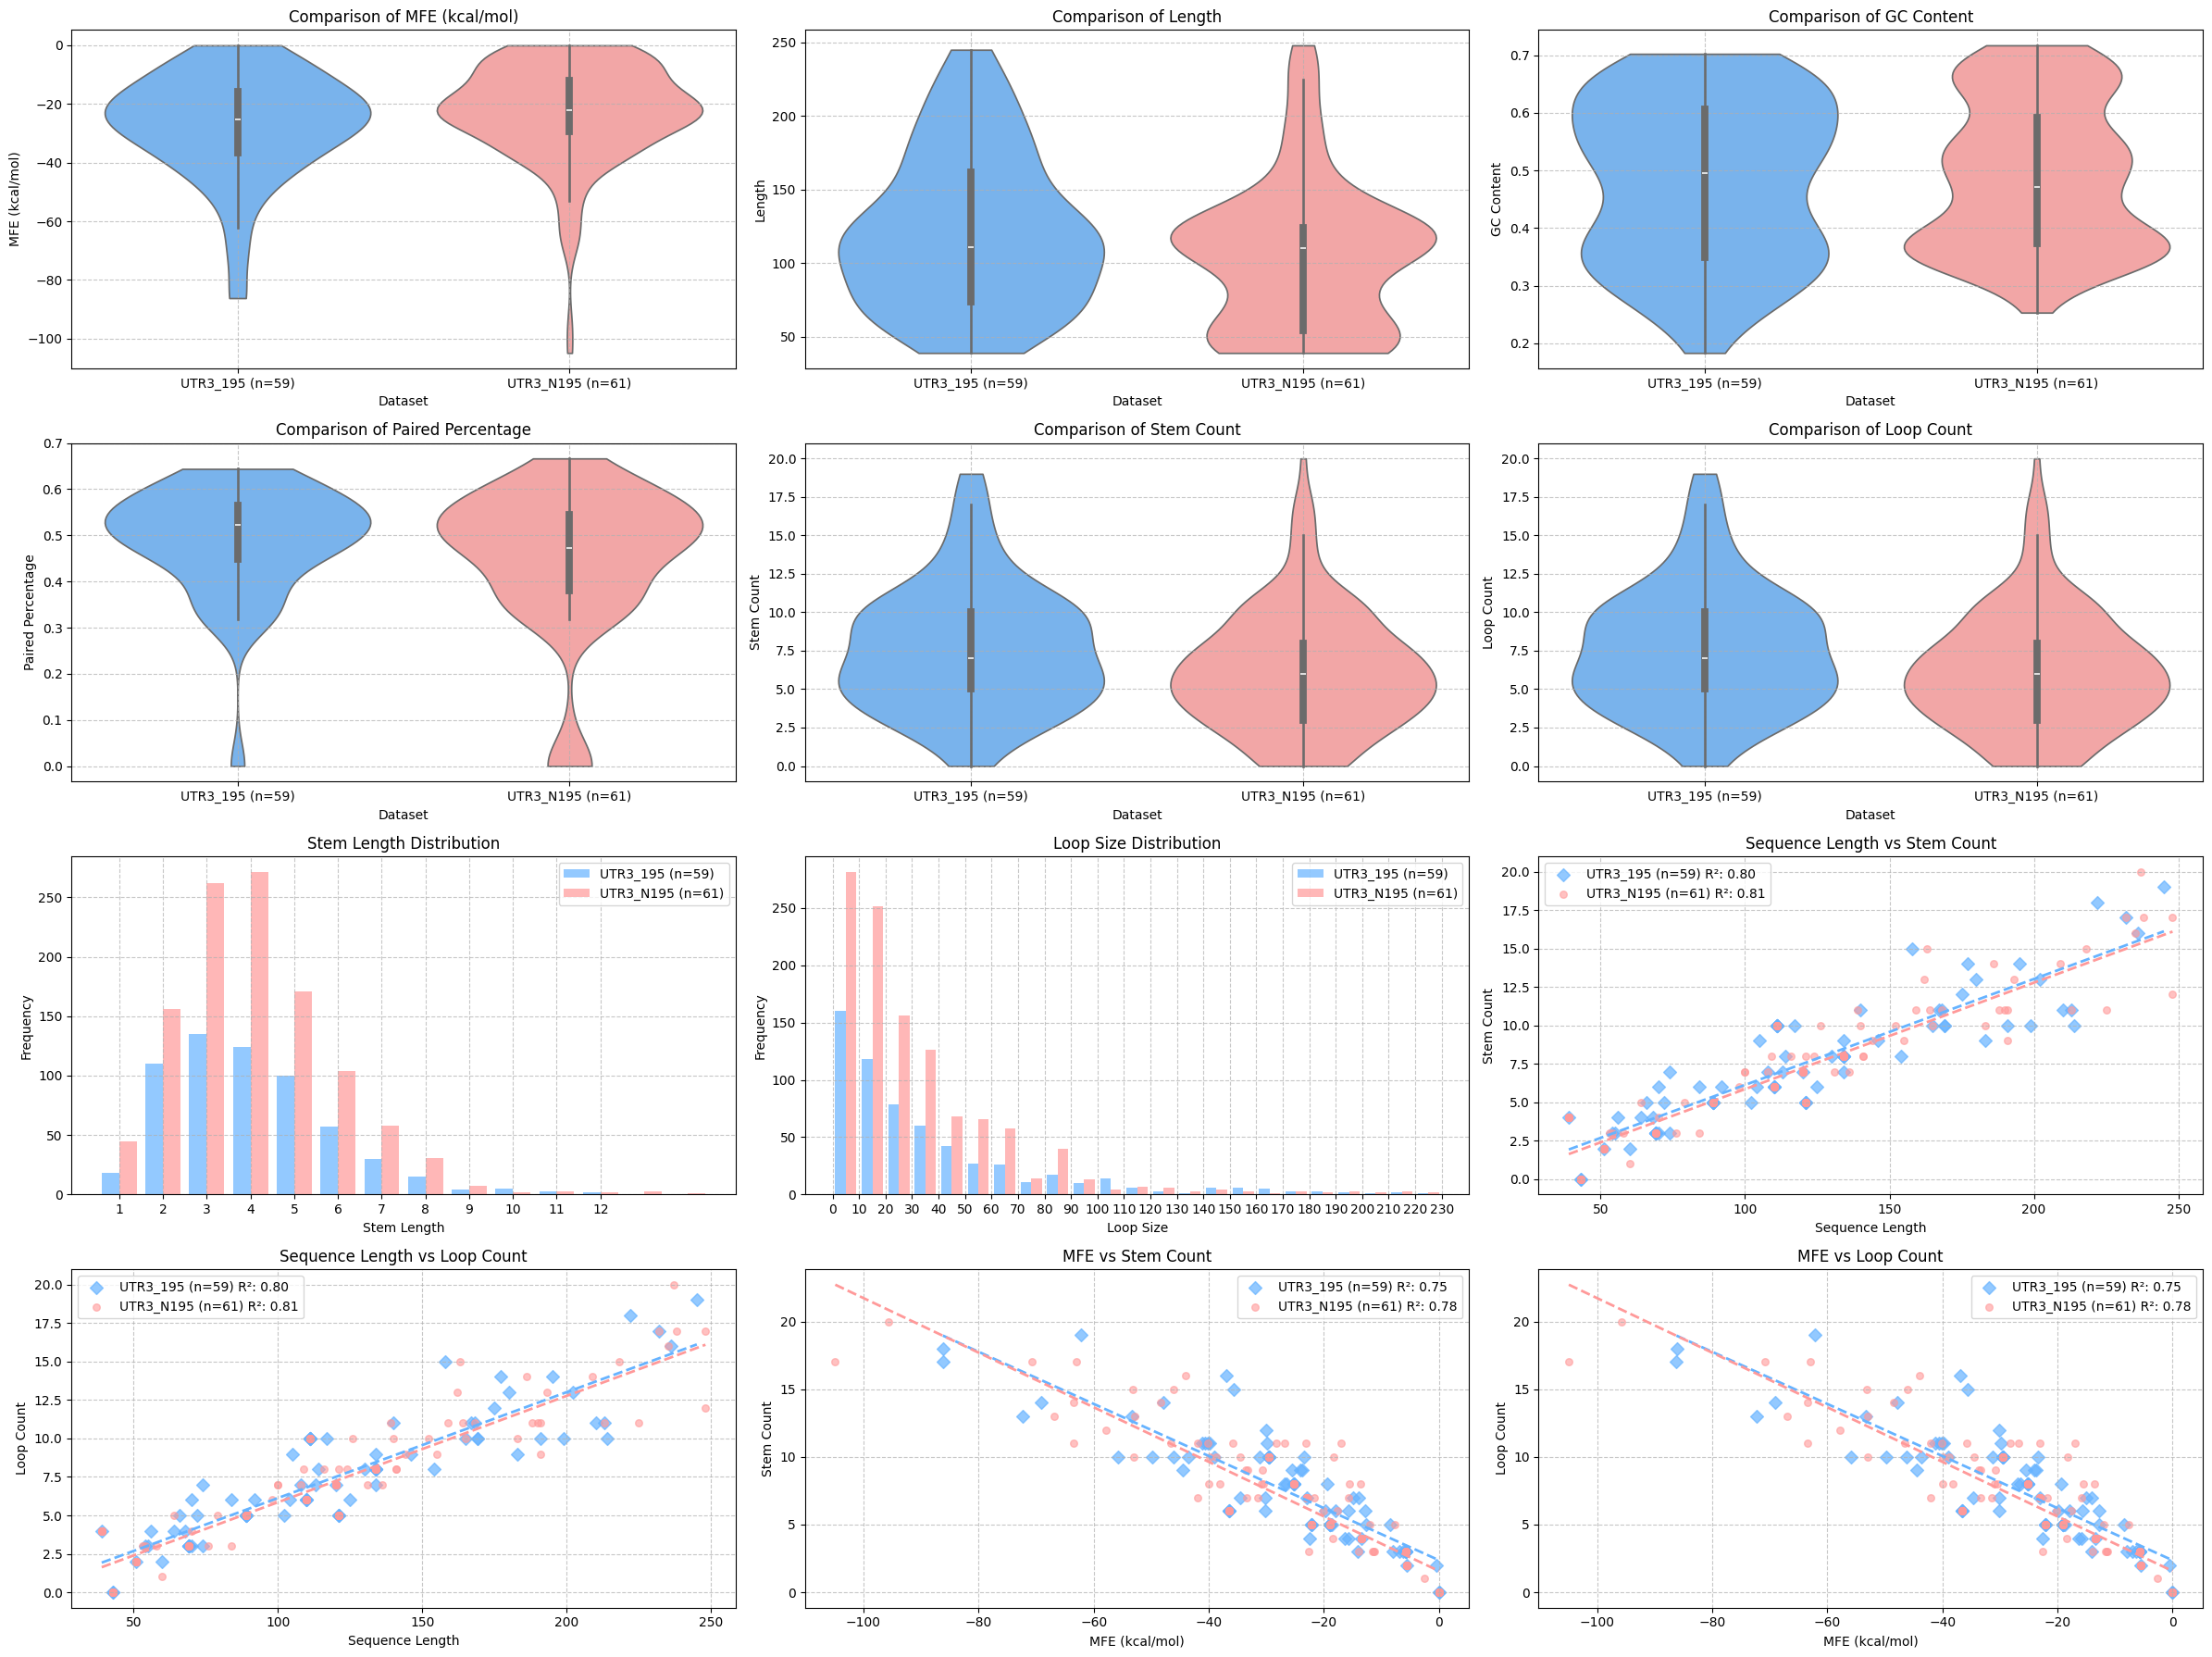

In [35]:
summary = compare_rna_structure_data(
    utr3_195_res, 
    utr3_N195_res, 
    name1="UTR3_195 (n=59)", 
    name2="UTR3_N195 (n=61)", 
    output_prefix="utr3_comparison"
)

/tmp/ipykernel_3724398/510785945.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_df, x='Dataset', y='Value', cut=0, inner='box',
/tmp/ipykernel_3724398/510785945.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_df, x='Dataset', y='Value', cut=0, inner='box',
/tmp/ipykernel_3724398/510785945.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_df, x='Dataset', y='Value', cut=0, inner='box',
/tmp/ipykernel_3724398/510785945.py:47: FutureWarning: 

Passing `palette` without assigning `hue` i

所有比较图表已生成并保存到 ./RESULT_SS/ 目录!


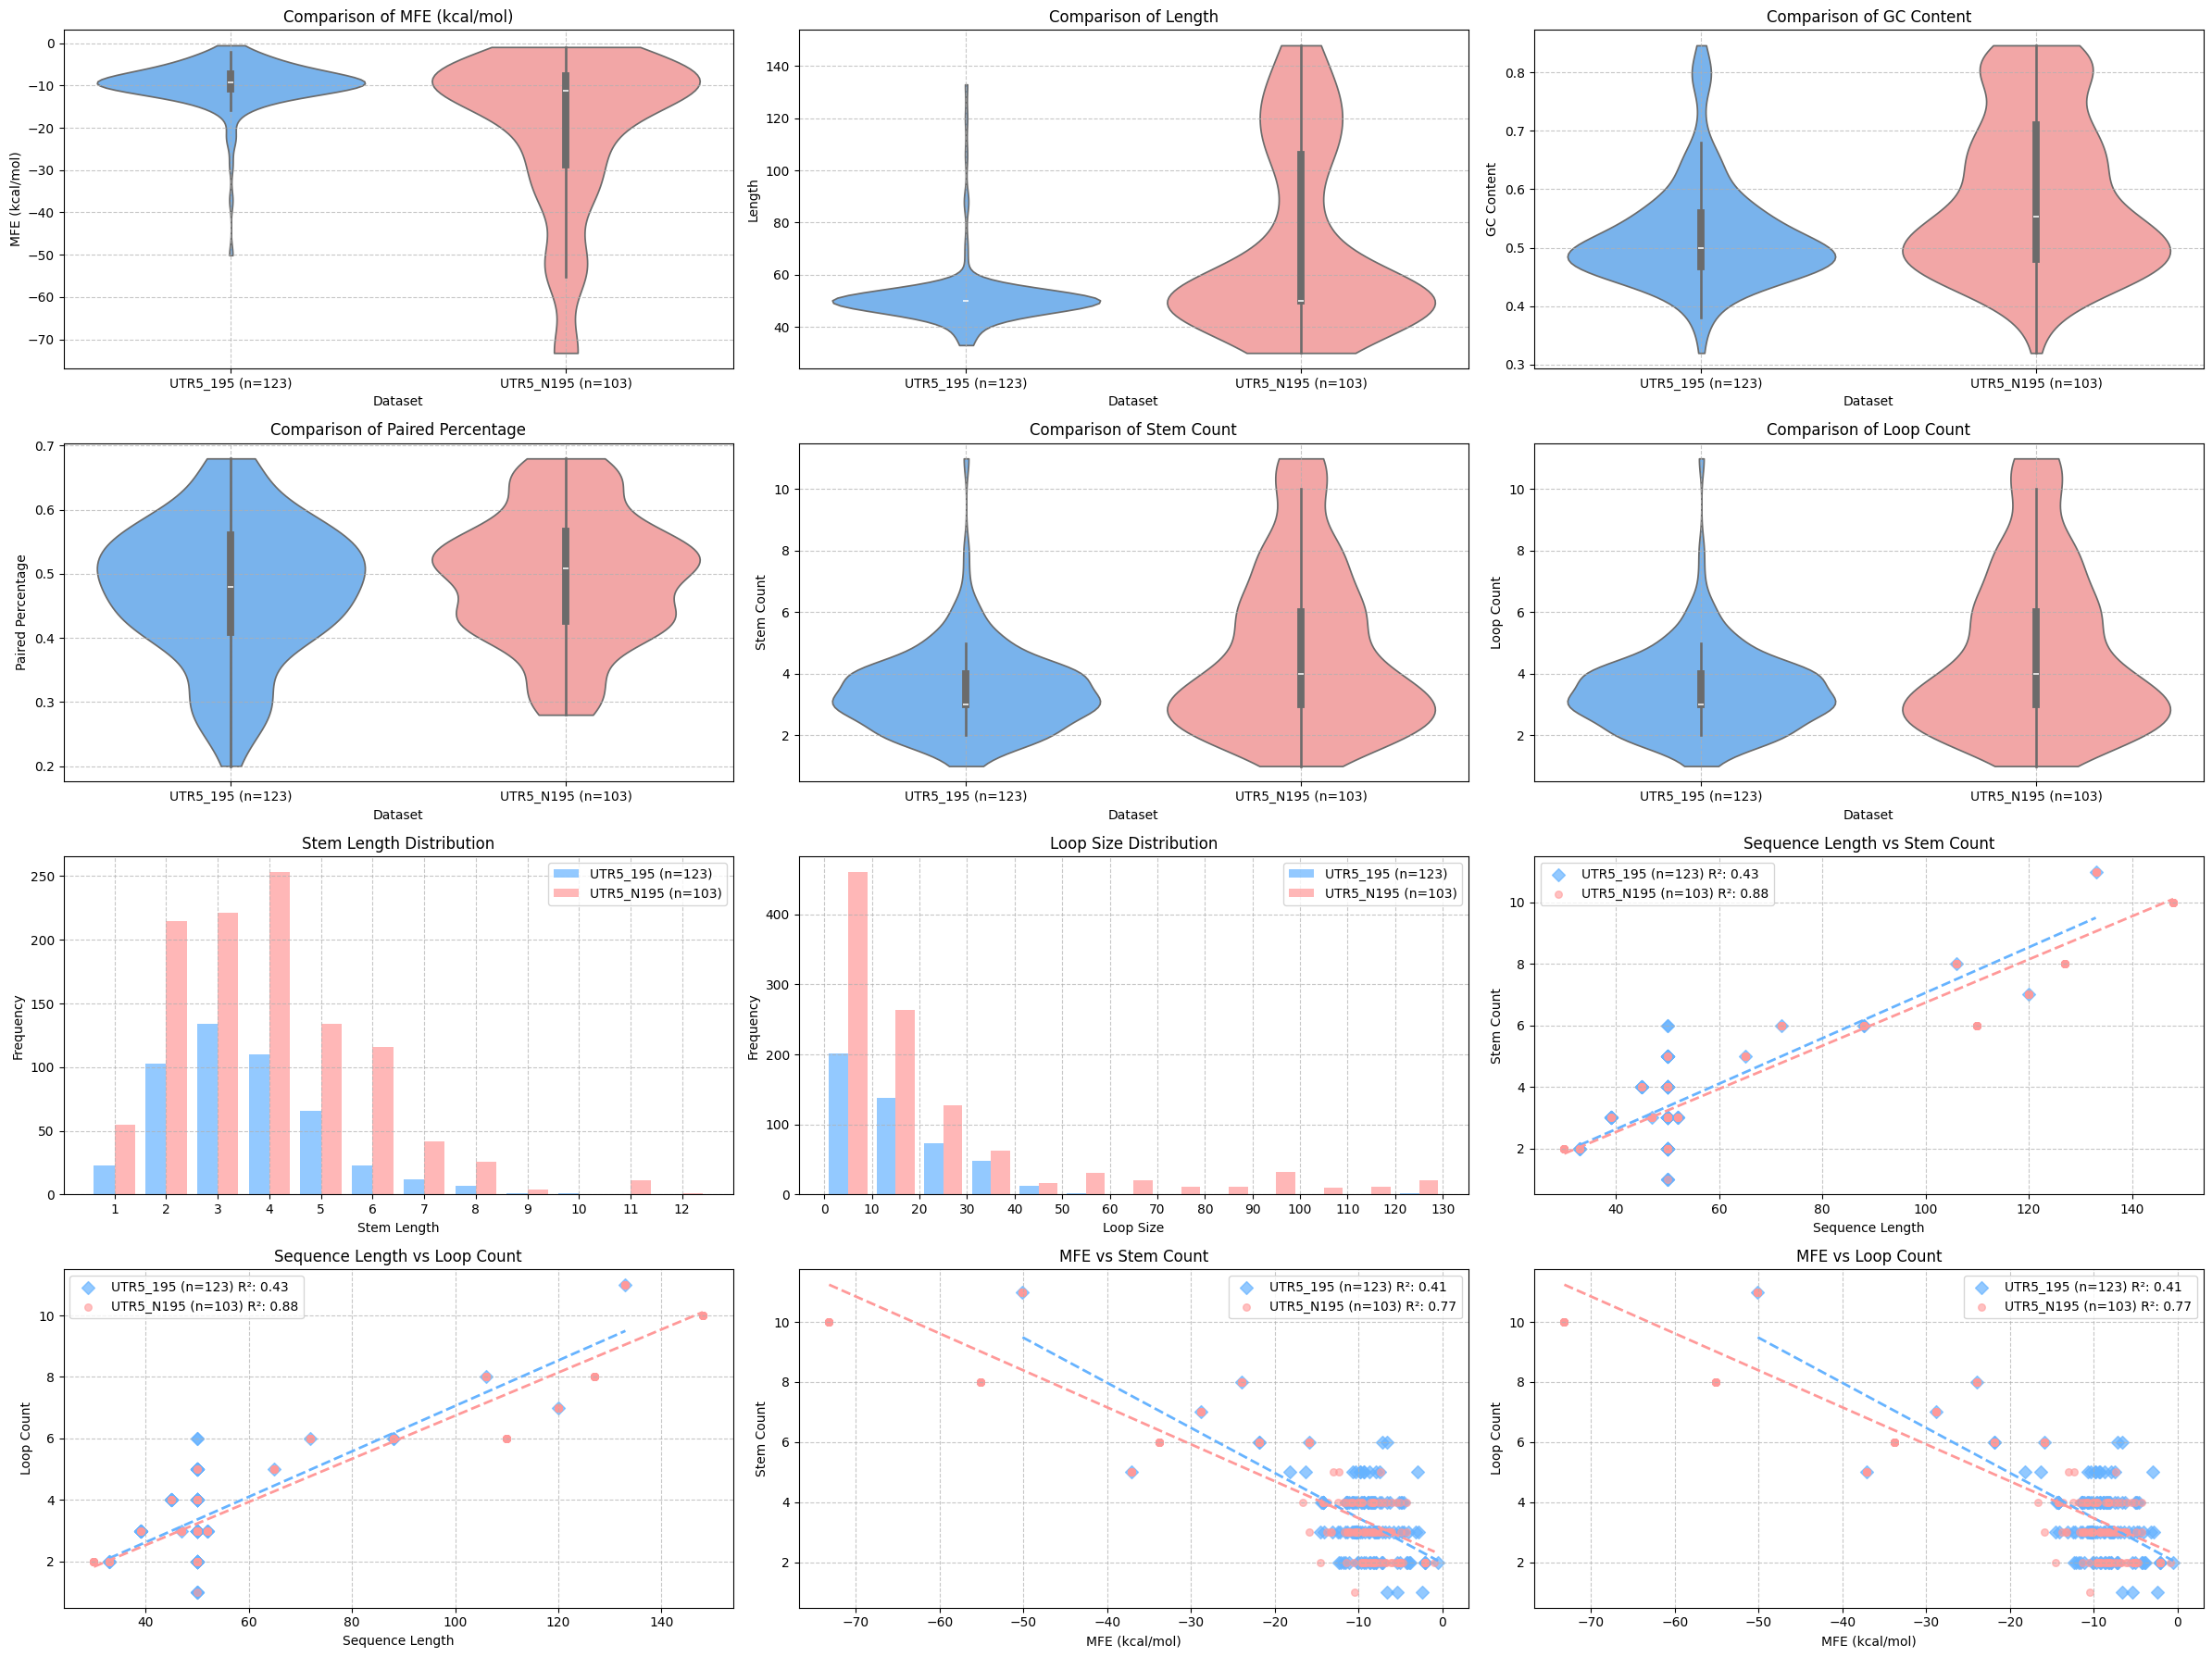

In [36]:
summary = compare_rna_structure_data(
    utr5_195_res, 
    utr5_N195_res, 
    name1="UTR5_195 (n=123)", 
    name2="UTR5_N195 (n=103)", 
    output_prefix="utr5_comparison"
)

In [21]:
utr5_N195_res.Length.unique()

array([ 50,  52, 148,  33,  45,  88, 133, 106, 127,  30,  47, 110,  39,
        72, 120,  65])